## STATS 503 Data Challenge

In [206]:
#Import all packages

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [207]:
test = pd.read_csv('final_data/test_nolabel.csv')
test.head()

,ID,Outcome,Score
0,1,NaN,NaN
1,8,NaN,NaN
2,9,NaN,NaN
3,10,NaN,NaN
4,11,NaN,NaN


In [208]:
#test = pd.read_csv('final_data/test_nolabel.txt', delimiter = "\t")

#Training Outcomes
train = pd.read_csv('final_data/train_outcome.csv')
train.describe()

,ID,Outcome
count,15144.000000,15144.000000
mean,10822.677298,0.136358
std,6226.623458,0.343179
min,2.000000,0.000000
25%,5459.750000,0.000000
50%,10812.500000,0.000000
75%,16201.250000,0.000000
max,21633.000000,1.000000


15,144 patients in the training set. 2065 have septis, 13078 do not.

* If have septis, outcome equal 1

In [234]:
#Extrating one txt
pat_1 = pd.read_csv('final_data/x_all/11303.txt', delimiter = ",")
pat_1

,Hour,Variable,Value
0,1,ID,11303.00
1,5,Age,84.93
2,5,DBP,66.77
3,5,Gender,1.00
4,5,HR,67.02
...,...,...,...
190,25,HR,82.69
191,25,MAP,79.23
192,25,O2Sat,90.93
193,25,Resp,26.22


In [5]:
#p = pat_1.loc[pat_1['Variable'] == "ID"].Value

* Each txt had different measures of different variables over a given timeframe. For patient 1, we see that there are 17 hours.

* 136 rows (which will vary for each) by 3 columns: The three columns are: Hour, Variable, Value

In [235]:
#Grouping by the variables to see how many we have (Have to group by variable to keep measures separate)
pat_1.groupby(['Variable']).sum().transpose()

Variable,Age,BUN,BaseExcess,Calcium,Chloride,Creatinine,DBP,FiO2,Gender,Glucose,...,PTT,PaCO2,Phosphate,Platelets,Potassium,Resp,SBP,Temp,WBC,pH
Hour,315.00,8.0,18.00,8.0,8.0,8.0,278.00,83.0,315.0,8.0,...,8.0,18.00,8.0,8.0,8.0,315.00,315.00,61.00,8.0,18.00
Value,1783.53,18.0,1.73,8.4,100.0,0.8,1192.97,2.5,21.0,166.0,...,23.9,90.97,4.1,169.0,4.7,468.35,2773.35,147.63,11.7,14.74


Using mean of each variable, create time as independent variable

In [236]:
p = pat_1.groupby(['Variable']).mean().transpose()
p['Hour'] = max(pat_1['Hour'])
p = p.drop(['Hour'], axis = 0)
p.shape

(1, 29)

## Adding Min and Max

In [237]:
maxes = pat_1.groupby('Variable').max()
mins = pat_1.groupby('Variable').min()

In [238]:
maxes = maxes.drop(['Hour'], axis = 1).transpose()
maxes['Hour'] = max(pat_1['Hour'])
maxes = maxes.add_suffix('_max')
mins = mins.drop(['Hour'], axis = 1).transpose()
mins['Hour'] = min(pat_1['Hour'])
mins = mins.add_suffix('_min')

In [239]:
min_max = pd.concat([mins, maxes], axis=1)
min_max.head()

Variable,Age_min,BUN_min,BaseExcess_min,Calcium_min,Chloride_min,Creatinine_min,DBP_min,FiO2_min,Gender_min,Glucose_min,...,PaCO2_max,Phosphate_max,Platelets_max,Potassium_max,Resp_max,SBP_max,Temp_max,WBC_max,pH_max,Hour_max
Value,84.93,18.0,-0.14,8.4,100.0,0.8,53.13,0.4,1.0,166.0,...,47.18,4.1,169.0,4.7,30.2,151.48,37.38,11.7,7.48,25


In [240]:
p = pd.concat([p, min_max], axis=1)
p.shape

(1, 87)

In [241]:
p.head(1)

Variable,Age,BUN,BaseExcess,Calcium,Chloride,Creatinine,DBP,FiO2,Gender,Glucose,...,PaCO2_max,Phosphate_max,Platelets_max,Potassium_max,Resp_max,SBP_max,Temp_max,WBC_max,pH_max,Hour_max
Value,84.93,18.0,0.865,8.4,100.0,0.8,62.787895,0.416667,1.0,166.0,...,47.18,4.1,169.0,4.7,30.2,151.48,37.38,11.7,7.48,25


In [242]:
p.columns

Index(['Age', 'BUN', 'BaseExcess', 'Calcium', 'Chloride', 'Creatinine', 'DBP',
       'FiO2', 'Gender', 'Glucose', 'HCO3', 'HR', 'Hct', 'Hgb', 'ID', 'MAP',
       'Magnesium', 'O2Sat', 'PTT', 'PaCO2', 'Phosphate', 'Platelets',
       'Potassium', 'Resp', 'SBP', 'Temp', 'WBC', 'pH', 'Hour', 'Age_min',
       'BUN_min', 'BaseExcess_min', 'Calcium_min', 'Chloride_min',
       'Creatinine_min', 'DBP_min', 'FiO2_min', 'Gender_min', 'Glucose_min',
       'HCO3_min', 'HR_min', 'Hct_min', 'Hgb_min', 'ID_min', 'MAP_min',
       'Magnesium_min', 'O2Sat_min', 'PTT_min', 'PaCO2_min', 'Phosphate_min',
       'Platelets_min', 'Potassium_min', 'Resp_min', 'SBP_min', 'Temp_min',
       'WBC_min', 'pH_min', 'Hour_min', 'Age_max', 'BUN_max', 'BaseExcess_max',
       'Calcium_max', 'Chloride_max', 'Creatinine_max', 'DBP_max', 'FiO2_max',
       'Gender_max', 'Glucose_max', 'HCO3_max', 'HR_max', 'Hct_max', 'Hgb_max',
       'ID_max', 'MAP_max', 'Magnesium_max', 'O2Sat_max', 'PTT_max',
       'PaCO2_max', 

## Trying to Capture Longitudinal Information

* We are going to include the difference of each, or using rolling window mean

In [243]:
#To capture Longitudinal Information, instead of using rolling window, we will do first and last

#Already have min and max hour, so dont have to add here

first = pat_1.groupby('Variable').first().transpose()
first.drop(['Hour'], axis = 0, inplace=True)

In [244]:
first.head()

Variable,Age,BUN,BaseExcess,Calcium,Chloride,Creatinine,DBP,FiO2,Gender,Glucose,...,PTT,PaCO2,Phosphate,Platelets,Potassium,Resp,SBP,Temp,WBC,pH
Value,84.93,18.0,1.87,8.4,100.0,0.8,66.77,0.5,1.0,166.0,...,23.9,47.18,4.1,169.0,4.7,14.12,150.81,37.38,11.7,7.48


In [245]:
last = pat_1.groupby('Variable').last().transpose()
last.drop(['Hour'], axis = 0, inplace = True)

In [246]:
last.head()

Variable,Age,BUN,BaseExcess,Calcium,Chloride,Creatinine,DBP,FiO2,Gender,Glucose,...,PTT,PaCO2,Phosphate,Platelets,Potassium,Resp,SBP,Temp,WBC,pH
Value,84.93,18.0,-0.14,8.4,100.0,0.8,56.3,0.4,1.0,166.0,...,23.9,43.79,4.1,169.0,4.7,26.22,119.9,37.16,11.7,7.26


In [247]:
pat_1['Hour'].max()

25

In [248]:
diff = last-first
diff

Variable,Age,BUN,BaseExcess,Calcium,Chloride,Creatinine,DBP,FiO2,Gender,Glucose,...,PTT,PaCO2,Phosphate,Platelets,Potassium,Resp,SBP,Temp,WBC,pH
Value,0.0,0.0,-2.01,0.0,0.0,0.0,-10.47,-0.1,0.0,0.0,...,0.0,-3.39,0.0,0.0,0.0,12.1,-30.91,-0.22,0.0,-0.22


In [200]:
#diff.loc['Value']

In [249]:
count = pat_1.groupby('Variable').count().transpose()
count.drop(['Hour'], axis = 0, inplace = True)

In [250]:
d = diff.loc['Value'] / count.loc['Value']
avg_diff = pd.DataFrame(d).transpose().add_suffix('_ad')
avg_diff

Variable,Age_ad,BUN_ad,BaseExcess_ad,Calcium_ad,Chloride_ad,Creatinine_ad,DBP_ad,FiO2_ad,Gender_ad,Glucose_ad,...,PTT_ad,PaCO2_ad,Phosphate_ad,Platelets_ad,Potassium_ad,Resp_ad,SBP_ad,Temp_ad,WBC_ad,pH_ad
Value,0.0,0.0,-1.005,0.0,0.0,0.0,-0.551053,-0.016667,0.0,0.0,...,0.0,-1.695,0.0,0.0,0.0,0.57619,-1.471905,-0.055,0.0,-0.11


In [251]:
p = pd.concat([p, avg_diff], axis=1)

In [252]:
p.set_index('ID')

Variable,Age,BUN,BaseExcess,Calcium,Chloride,Creatinine,DBP,FiO2,Gender,Glucose,...,PTT_ad,PaCO2_ad,Phosphate_ad,Platelets_ad,Potassium_ad,Resp_ad,SBP_ad,Temp_ad,WBC_ad,pH_ad
ID,,,,,,,,,,,,,,,,,,,,,
11303.0,84.93,18.0,0.865,8.4,100.0,0.8,62.787895,0.416667,1.0,166.0,...,0.0,-1.695,0.0,0.0,0.0,0.57619,-1.471905,-0.055,0.0,-0.11


# THIS IS GOLD

In [202]:
#Write a loop to use averages for every file --> UPDATED goos
import glob

#Defining the path of the file
path = 'final_data/x_all'
#Entire Folder
file_list = glob.glob(path + "/*.txt")



#Blank DF that we will concat to
main = pd.DataFrame()

#Writing the loop
for i in range(0,1): 
#Iterate over entirity of list (len(file_list) is final)
    
    #Load in individual patient file
    df_org = pd.read_csv(file_list[i], delimiter = ",")
    
    #Get our three DF based on the summary statistics and transpose them
    df = df_org.groupby(['Variable']).median().transpose()
    maxes = df_org.groupby('Variable').max().transpose()
    mins = df_org.groupby('Variable').min().transpose()
    first = df_org.groupby('Variable').first().transpose()
    last = df_org.groupby('Variable').last().transpose()
    count = df_org.groupby('Variable').count().transpose()

    #Add Hour Column to transposed median matrix (add column suffixes for simplicity)
    df['Hour'] = df_org['Hour'].median()
    maxes['Hour'] = max(pat_1['Hour'])
    maxes = maxes.add_suffix('_max')
    mins['Hour'] = min(pat_1['Hour'])
    mins = mins.add_suffix('_min')
    
    
    #Drop Hour row to get each patient into one row (since it was transposed, must drop this other row)
    df = df.drop(['Hour'], axis = 0)
    maxes = maxes.drop(['Hour'], axis = 0)
    mins = mins.drop(['Hour'], axis = 0)
    first = first.drop(['Hour'], axis = 0)
    last = last.drop(['Hour'], axis = 0)
    count = count.drop(['Hour'], axis = 0)
    
    #Get Avg
    diff = last-first
    
    #Getting the avg diff DF
    d = diff.loc['Value'] / count.loc['Value']
    avg_diff = pd.DataFrame(d).transpose().add_suffix('_ad')
    
    #Merging All 3 Together side by side so we still have one row
    min_max = pd.concat([mins, maxes], axis=1)
    min_max_avg = pd.concat([min_max, avg_diff], axis=1)
    df = pd.concat([df, min_max_avg], axis=1)
    
    #Add each patient to the previous
    main = pd.concat([main, df], axis = 0)

    
#Total Run Time = About 11 minutes

#This way the Patient ID is now the index variable and sorted    
main = main.set_index(['ID']).sort_index(ascending = True)

In [204]:
#When we run with one file, it matches
main

Variable,Age,BUN,BaseExcess,Calcium,Chloride,Creatinine,DBP,FiO2,Gender,Glucose,...,PTT_ad,PaCO2_ad,Phosphate_ad,Platelets_ad,Potassium_ad,Resp_ad,SBP_ad,Temp_ad,WBC_ad,pH_ad
ID,,,,,,,,,,,,,,,,,,,,,
11303.0,84.93,18.0,0.865,8.4,100.0,0.8,61.65,0.4,1.0,166.0,...,0.0,-1.695,0.0,0.0,0.0,0.57619,-1.471905,-0.055,0.0,-0.11


* The self constructed lag

This is an example output for each patient

* For each patient, we can try to:
    + Take the average of each variable (using groupby.mean())
    + Take last entry, include time as a feature variable
    + Inputation method
- This way, each patient is treated as a datapoint

In [10]:
#Testing out another
pat_2 = pd.read_csv('final_data/x_all/2.txt', delimiter = ",")
pat_2
pat_2.groupby(['Variable']).mean()

,Hour,Value
Variable,,
Age,14.000000,66.670000
BUN,17.500000,12.035000
BaseExcess,4.500000,0.990000
Chloride,17.500000,107.465000
Creatinine,17.000000,0.700000
DBP,14.150000,58.804000
FiO2,4.500000,0.400000
Gender,14.000000,1.000000
Glucose,10.500000,122.205000


In [11]:
#Write a loop to use averages for every file
import glob

#Path of file
path = 'final_data/x_all'
#Entire Folder
file_list = glob.glob(path + "/*.txt")
#Extract first as the (base --> Change this to id = 1)

#Our first DF, that serves as the reference for the others

#Might have to make a blank one with all of our variables
main = pd.DataFrame()


#Writing the loop
for i in range(0,len(file_list)): #Iterate over entirity of list (already have the first) (len(file_list) is final)
    
    #Load in individual patient
    df_org = pd.read_csv(file_list[i], delimiter = ",")
    
    #Group by to get average of each variable for each patient, put into a 2x19 with Hour and Variable as Rows
    df = df_org.groupby(['Variable']).median().transpose()
    
    #Add Hour Column to transposed matrix
    df['Hour'] = max(df_org['Hour']) #max hour from original
    
    #Drop Hour row to get each patient into one row
    df = df.drop(['Hour'], axis = 0)
    
    #Add patient to the previous
    main = pd.concat([main, df], axis = 0)

#Total Run Time = About 5 minutes

#This way the Patient ID is now the index variable and sorted    
main = main.set_index(['ID']).sort_index(ascending = True)

In [38]:
main.head()

Variable,Age,BUN,BaseExcess,Calcium,Chloride,Creatinine,DBP,FiO2,Gender,Glucose,...,Unit1,Unit2,AST,Alkalinephos,Bilirubin_total,Lactate,TroponinI,Fibrinogen,Bilirubin_direct,EtCO2
ID,,,,,,,,,,,,,,,,,,,,,
1.0,50.73,15.000,NaN,NaN,NaN,0.50,60.685,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,66.67,12.035,0.99,NaN,107.465,0.70,59.135,0.40,1.0,122.205,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,79.74,9.090,2.79,8.40,107.340,0.60,54.120,0.52,0.0,122.160,...,0.0,1.0,NaN,NaN,NaN,1.34,NaN,214.1,NaN,NaN
4.0,35.18,NaN,NaN,9.30,NaN,0.75,77.710,NaN,1.0,175.330,...,1.0,0.0,NaN,NaN,NaN,NaN,0.07,NaN,NaN,NaN
5.0,60.74,13.900,NaN,7.37,NaN,0.71,70.920,0.50,1.0,122.180,...,NaN,NaN,36.0,58.0,1.3,0.77,0.01,NaN,NaN,29.89


* The above loops reads each txt into python and then adds it onto the previous dataframe.
* Each Patient is its own row, as indicated by its ID. The max hour is included as well. All of our vairables are a column in the dataframe

### Different Data Inputation Method

### Exploratory Data Analysis

##### Playing around with the variables in our dataframe

In [13]:
main.head()

Variable,Age,BUN,BaseExcess,Calcium,Chloride,Creatinine,DBP,FiO2,Gender,Glucose,...,Unit1,Unit2,AST,Alkalinephos,Bilirubin_total,Lactate,TroponinI,Fibrinogen,Bilirubin_direct,EtCO2
ID,,,,,,,,,,,,,,,,,,,,,
1.0,50.73,15.000,NaN,NaN,NaN,0.50,60.685,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,66.67,12.035,0.99,NaN,107.465,0.70,59.135,0.40,1.0,122.205,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,79.74,9.090,2.79,8.40,107.340,0.60,54.120,0.52,0.0,122.160,...,0.0,1.0,NaN,NaN,NaN,1.34,NaN,214.1,NaN,NaN
4.0,35.18,NaN,NaN,9.30,NaN,0.75,77.710,NaN,1.0,175.330,...,1.0,0.0,NaN,NaN,NaN,NaN,0.07,NaN,NaN,NaN
5.0,60.74,13.900,NaN,7.37,NaN,0.71,70.920,0.50,1.0,122.180,...,NaN,NaN,36.0,58.0,1.3,0.77,0.01,NaN,NaN,29.89


In [14]:
#Averages for everything
main.describe()

Variable,Age,BUN,BaseExcess,Calcium,Chloride,Creatinine,DBP,FiO2,Gender,Glucose,...,Unit1,Unit2,AST,Alkalinephos,Bilirubin_total,Lactate,TroponinI,Fibrinogen,Bilirubin_direct,EtCO2
count,21634.000000,19854.000000,6912.000000,18000.000000,11169.000000,19773.000000,17497.000000,9187.000000,21634.000000,20315.000000,...,13210.000000,13210.000000,6753.000000,6653.000000,6656.000000,6101.000000,3211.000000,2059.000000,939.000000,1688.000000
mean,61.612462,22.278369,-0.336839,8.081403,105.458102,1.438727,63.289663,0.490331,0.565869,129.603261,...,0.506359,0.493641,150.534849,97.818131,1.513944,2.123617,5.951836,319.629713,1.493759,33.108735
std,16.475634,18.225671,3.966668,1.540093,5.220209,1.758874,11.183957,0.302254,0.495654,38.349127,...,0.499978,0.499978,567.875008,108.595266,3.132054,1.839281,20.236177,169.788932,3.298224,10.261251
min,13.770000,0.960000,-24.000000,0.760000,69.900000,0.100000,26.910000,-23.370000,0.000000,19.000000,...,0.000000,0.000000,4.000000,6.955000,0.100000,0.300000,0.010000,35.000000,0.010000,9.930000
25%,51.050000,11.450000,-2.010000,7.850000,102.515000,0.700000,55.450000,0.400000,0.000000,105.670000,...,0.000000,0.000000,21.000000,53.920000,0.500000,1.190000,0.030000,204.000000,0.200000,28.430000
50%,63.285000,16.535000,-0.020000,8.305000,105.890000,0.900000,62.070000,0.480000,1.000000,122.720000,...,1.000000,0.000000,35.000000,72.000000,0.790000,1.630000,0.140000,278.630000,0.400000,33.070000
75%,74.010000,26.000000,1.081250,8.770000,108.800000,1.310000,69.990000,0.510000,1.000000,142.840000,...,1.000000,1.000000,73.000000,104.000000,1.300000,2.360000,1.715000,394.500000,1.102500,37.280000
max,100.990000,231.710000,25.000000,25.200000,137.060000,27.065000,131.510000,2.000000,1.000000,563.000000,...,1.000000,1.000000,9869.010000,3724.130000,45.415000,26.950000,226.780000,1383.000000,37.500000,100.565000


<AxesSubplot:xlabel='Variable'>

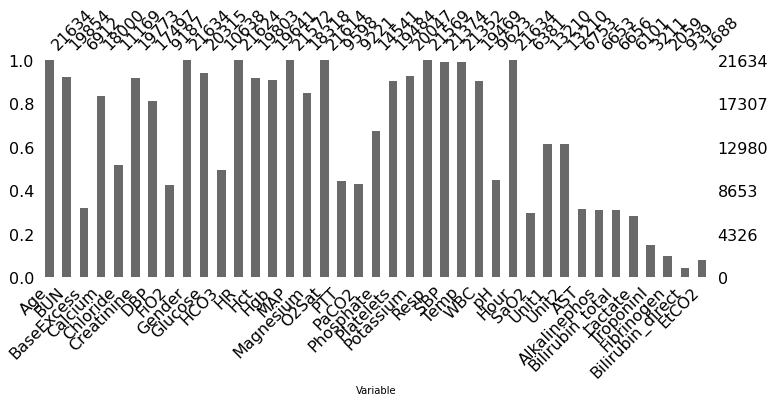

In [15]:
#Visualizing the missing data
import missingno as msno
msno.bar(main, figsize=(12,4))

### Dealing with NAs

In [16]:
#Train (split into X and Y)
main_train = pd.merge(main,train, on = 'ID')
main_train.head()

X_train = main_train.drop(['Outcome'],axis=1)
y_train = main_train['Outcome']

In [17]:
#Test (split into x and y)
main_test = pd.merge(main, test, on = 'ID')
main_test.head()

X_test = main_test.drop(['Outcome','Score'], axis=1)
y_test = main_test['Outcome']

In [18]:
#First Idea is to do MICE to fill in the NAs in the main --> We will keep average
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=42) #10 = # of iterations
X_train_mice = imp.fit_transform(X_train)
X_test_mice = imp.fit_transform(X_test)

In [19]:
#Have to get the column names back
trans_X_train = pd.DataFrame(X_train_mice, columns = X_train.columns).set_index('ID')
trans_X_test = pd.DataFrame(X_test_mice, columns = X_test.columns).set_index('ID')

trans_X_test.shape

(6490, 39)

At this point, the data has been inputed using MICE, and we can now try and build a model with our testing data and then predict our points.

In [20]:
#Re-Add Outcome Variables to Train
final_X_train = pd.merge(trans_X_train, train, on = 'ID')

### The Model

In [21]:
#Logistic Regression --> This is no good
#from sklearn.linear_model import LogisticRegression
#log_model = LogisticRegression()
#log_model.fit(trans_X_train, y_train)

#log_model.intercept_
#y_pred = log_model.predict(trans_X_test)
#sum(y_pred)
#This predicts 119 of the test set has septsis

#y_pred_prob = log_model.predict_proba(trans_X_test)
#y_pred_prob

### Try Something Else

In [22]:
#Build an optimal tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#tree1 = DecisionTreeClassifier(random_state=0)
#tree1 = tree1.fit(trans_X_train, y_train)

#training_error = 1 -  tree1.score(trans_X_train, y_train)
#print('training error is', training_error)

#sum(tree1.predict(trans_X_test))
#This predicts 922 of the test set has septis

### Validation

We need to now split our training data into a training set and validation set. We will use K-Fold CV

In [23]:
#This gets us into our Training Set and our Validation Set
health_train, health_val = train_test_split(final_X_train, test_size = 0.3, random_state= 123, stratify = final_X_train['Outcome'])

X_health_train = health_train.drop(['Outcome'], axis =1)
y_health_train = health_train['Outcome']
X_health_val = health_val.drop(['Outcome'], axis = 1)
y_health_val = health_val['Outcome']

### Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree1 = DecisionTreeClassifier(random_state=0)
tree1 = tree1.fit(X_health_train, y_health_train)

training_error = 1 -  tree1.score(X_health_train, y_health_train)
test_error = 1 -  tree1.score(X_health_val, y_health_val)
print('training error is', training_error)
print('test error is', test_error )

training error is 0.0
test error is 0.11597711267605637


Use CV to chose optimal CP

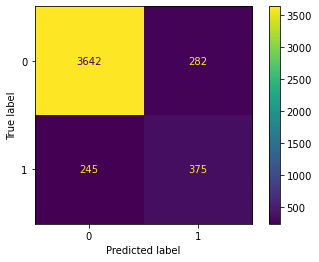

In [25]:
p = tree1.predict(X_health_val)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_health_val, p)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot(); 

### Random Forest with Max Features

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, max_features =  X_health_train.shape[1])
clf.fit(X_health_train, y_health_train)
accuracy = clf.score(X_health_val, y_health_val)
test_error_bagging = 1 - accuracy
test_error_bagging

0.06756161971830987

In [27]:
sum(y_health_val)

620

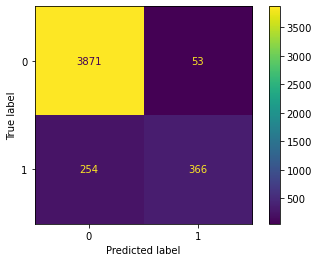

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

pred = clf.predict(X_health_val)
cm = confusion_matrix(y_health_val, pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot(); 

In [29]:
256 / (256+364)

0.4129032258064516

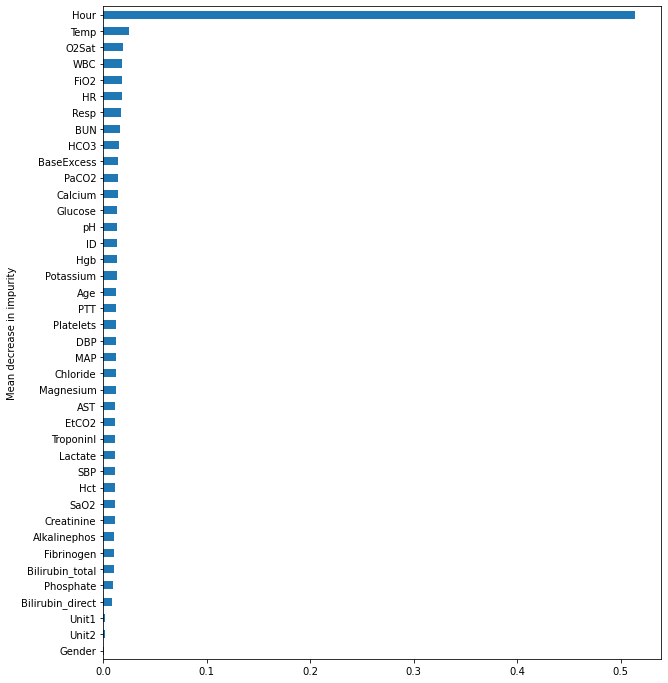

In [30]:
importances = clf.feature_importances_
forest_importances = pd.Series(importances, index= clf.feature_names_in_)


plt.figure(figsize=(10,12))
forest_importances.sort_values(ascending = True).plot.barh()
plt.ylabel("Mean decrease in impurity")
plt.show()

### RandomForest with the default sqrt(p) predictors

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_health_train, y_health_train)
accuracy = clf.score(X_health_val, y_health_val)
test_error_bagging = 1 - accuracy
test_error_bagging

0.06756161971830987

Going to now build off of this

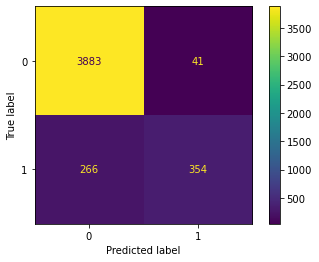

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

pred = clf.predict(X_health_val)
cm = confusion_matrix(y_health_val, pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot(); 

### Scoring

BER --> the average of the error rate on positive class examples and the error rate on negative class examples

In [33]:
(268/(268+352))

0.432258064516129